### Importação dos dados



In [2]:
# Importação das bibliotecas necessárias para a analise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Usado para tratar possíveis infinito na análise de produtos

# Importação dos dados
print("--- 1. Iniciando importação e preparação dos dados ---")
try:
    url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
    url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
    url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
    url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

    loja1_df = pd.read_csv(url1)
    loja2_df = pd.read_csv(url2)
    loja3_df = pd.read_csv(url3)
    loja4_df = pd.read_csv(url4)

    print("Dados importados com sucesso.")

    # Padronizar nomes das colunas essenciais
    # Mapeamento
    column_mapping = {
        'Produto': ['Produto', 'product_name'],
        'Categoria': ['Categoria do Produto', 'Categoria', 'category'],
        'Preco': ['Preço', 'Preco', 'price'],
        'Frete': ['Frete', 'freight_value'],
        'Avaliacao': ['Avaliação da compra', 'Avaliacao', 'customer_rating']
    }

    def standardize_columns(df, mapping):
        df = df.copy()
        new_columns = {}
        current_columns = df.columns.tolist()
        for standard_name, possible_names in mapping.items():
            found = False
            for possible_name in possible_names:
                if possible_name in current_columns:
                    new_columns[possible_name] = standard_name
                    found = True
                    break

        return df.rename(columns=new_columns)

    loja1 = standardize_columns(loja1_df, column_mapping)
    loja2 = standardize_columns(loja2_df, column_mapping)
    loja3 = standardize_columns(loja3_df, column_mapping)
    loja4 = standardize_columns(loja4_df, column_mapping)

    # Adicionar coluna de identificação da loja
    loja1['Loja'] = 'Loja 1'
    loja2['Loja'] = 'Loja 2'
    loja3['Loja'] = 'Loja 3'
    loja4['Loja'] = 'Loja 4'

    # Combinar todos os dataframes
    df_combinado = pd.concat([loja1, loja2, loja3, loja4], ignore_index=True)

    print("\n--- Verificando colunas após padronização e combinação ---")
    print(df_combinado.info())

    print("\n--- Iniciando limpeza e conversão de tipos ---")

    df_combinado['Preco'] = pd.to_numeric(df_combinado['Preco'], errors='coerce')
    df_combinado['Frete'] = pd.to_numeric(df_combinado['Frete'], errors='coerce')
    df_combinado['Avaliacao'] = pd.to_numeric(df_combinado['Avaliacao'], errors='coerce')


    print("\nValores ausentes após conversão inicial:")
    print(df_combinado[['Preco', 'Frete', 'Avaliacao']].isnull().sum())

    df_combinado.dropna(subset=['Preco', 'Frete', 'Avaliacao', 'Categoria', 'Produto'], inplace=True)

    print(f"\nNúmero de registros válidos após limpeza: {len(df_combinado)}")

except Exception as e:
    print(f"Erro durante a importação ou preparação dos dados: {e}")
    print("Verifique as URLs dos arquivos, a conexão com a internet e os nomes das colunas nos arquivos CSV.")

    exit()


sns.set_style("whitegrid")
plt.rc('figure', figsize=(10, 6))

--- 1. Iniciando importação e preparação dos dados ---
Dados importados com sucesso.

--- Verificando colunas após padronização e combinação ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9435 entries, 0 to 9434
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 9435 non-null   object 
 1   Categoria               9435 non-null   object 
 2   Preco                   9435 non-null   float64
 3   Frete                   9435 non-null   float64
 4   Data da Compra          9435 non-null   object 
 5   Vendedor                9435 non-null   object 
 6   Local da compra         9435 non-null   object 
 7   Avaliacao               9435 non-null   int64  
 8   Tipo de pagamento       9435 non-null   object 
 9   Quantidade de parcelas  9435 non-null   int64  
 10  lat                     9435 non-null   float64
 11  lon                     9435 non-null   float64
 12  L

#1. Análise do faturamento




--- 2. Análise do Faturamento Total (Soma de 'Preco') ---
Faturamento Total por Loja:
  Loja          Preco
Loja 1 R$1,534,509.12
Loja 2 R$1,488,459.06
Loja 3 R$1,464,025.03
Loja 4 R$1,384,497.58


<ipython-input-3-eeeb6909d6a0>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Loja', y='Preco', data=faturamento_total, palette='viridis', order=faturamento_total['Loja'])


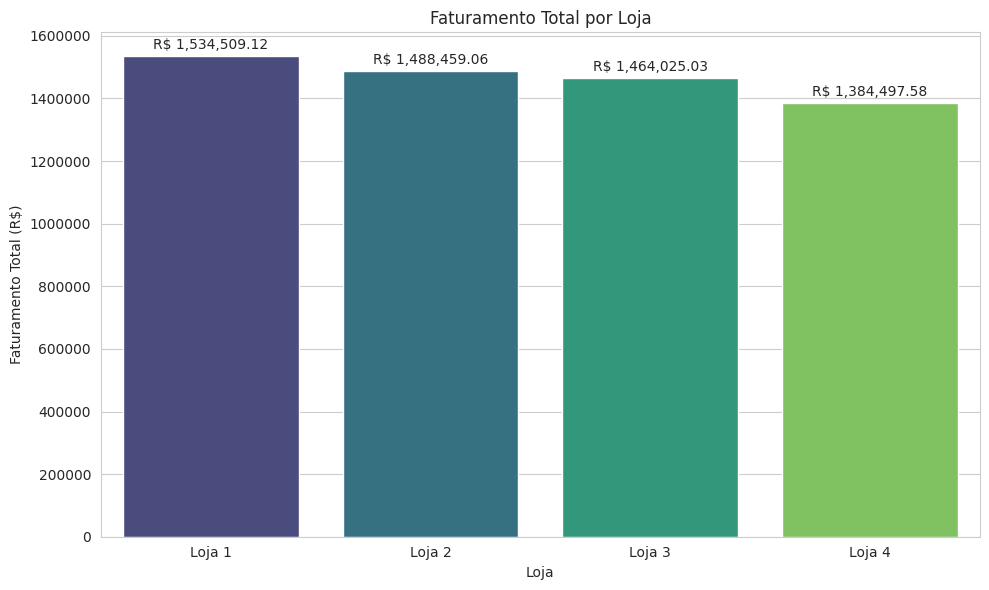

In [3]:
print("\n\n--- 2. Análise do Faturamento Total (Soma de 'Preco') ---")
faturamento_total = df_combinado.groupby('Loja')['Preco'].sum().reset_index()
faturamento_total = faturamento_total.sort_values(by='Preco', ascending=False)

print("Faturamento Total por Loja:")
faturamento_total_formatado = faturamento_total.copy()
faturamento_total_formatado['Preco'] = faturamento_total_formatado['Preco'].map('R${:,.2f}'.format)
print(faturamento_total_formatado.to_string(index=False))

# Gráfico de Faturamento
ax = sns.barplot(x='Loja', y='Preco', data=faturamento_total, palette='viridis', order=faturamento_total['Loja'])
ax.set_title('Faturamento Total por Loja')
ax.set_xlabel('Loja')
ax.set_ylabel('Faturamento Total (R$)')
plt.ticklabel_format(style='plain', axis='y')

# Adicionar rótulos de dados formatados
for container in ax.containers:
    ax.bar_label(container, fmt='R$ {:,.2f}', label_type='edge', padding=3)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria




--- 3. Análise das Categorias Mais Populares (Baseado em número de vendas) ---
Categoria mais popular por loja (baseado em número de vendas):
  Loja Categoria  Numero de Vendas
Loja 3    moveis               499
Loja 4    moveis               480
Loja 1    moveis               465
Loja 2    moveis               442


<ipython-input-4-4a28a8e871d7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax_cat = sns.barplot(x=top_categorias_geral.values, y=top_categorias_geral.index, palette='mako', orient='h')


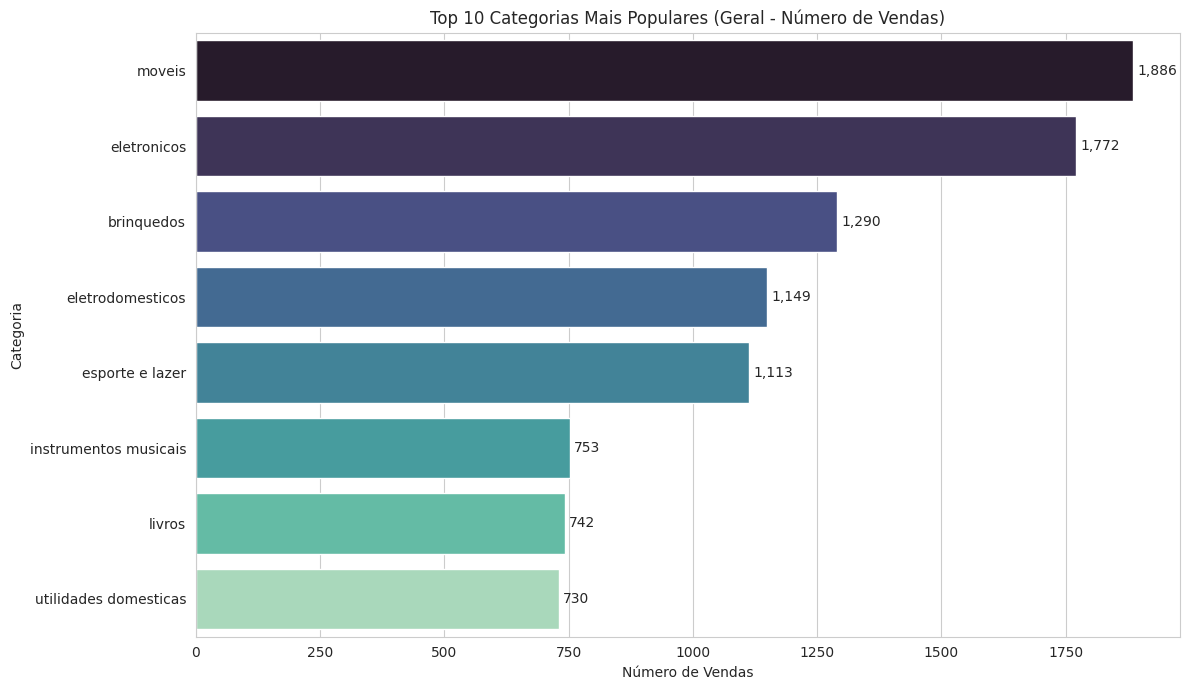

In [4]:
print("\n\n--- 3. Análise das Categorias Mais Populares (Baseado em número de vendas) ---")
# Contagem de vendas por categoria em cada loja
vendas_por_categoria = df_combinado.groupby('Loja')['Categoria'].value_counts().rename('Numero de Vendas').reset_index()

# Pegar a categoria mais popular (mais vendida) de cada loja
categorias_mais_populares_loja = vendas_por_categoria.loc[vendas_por_categoria.groupby('Loja')['Numero de Vendas'].idxmax()]
categorias_mais_populares_loja = categorias_mais_populares_loja.sort_values(by='Numero de Vendas', ascending=False)

print("Categoria mais popular por loja (baseado em número de vendas):")
print(categorias_mais_populares_loja.to_string(index=False))

# Gráfico das Top 10 Categorias Mais Vendidas (Geral)
plt.figure(figsize=(12, 7))
top_categorias_geral = df_combinado['Categoria'].value_counts().nlargest(10)

ax_cat = sns.barplot(x=top_categorias_geral.values, y=top_categorias_geral.index, palette='mako', orient='h')
ax_cat.set_title('Top 10 Categorias Mais Populares (Geral - Número de Vendas)')
ax_cat.set_xlabel('Número de Vendas')
ax_cat.set_ylabel('Categoria')

# Adicionar rótulos de dados
for container in ax_cat.containers:
    ax_cat.bar_label(container, fmt='{:,.0f}', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas



--- 4. Média de Avaliação dos Clientes ('Avaliacao') ---
Média de Avaliação por Loja:
  Loja Avaliacao
Loja 3      4.05
Loja 2      4.04
Loja 4      4.00
Loja 1      3.98


<ipython-input-7-36282434ac63>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_aval = sns.barplot(x='Loja', y='Avaliacao', data=avaliacao_media, palette='coolwarm', order=avaliacao_media['Loja'])


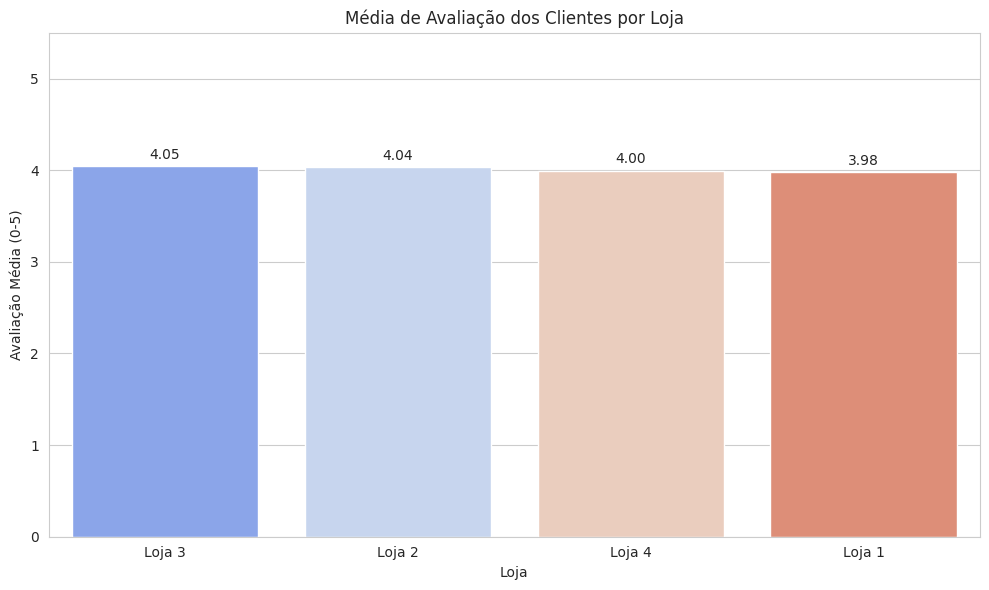

In [7]:
print("\n\n--- 4. Média de Avaliação dos Clientes ('Avaliacao') ---")
avaliacao_media = df_combinado.groupby('Loja')['Avaliacao'].mean().reset_index()
avaliacao_media = avaliacao_media.sort_values(by='Avaliacao', ascending=False)

print("Média de Avaliação por Loja:")
# Formatando a saída numérica
avaliacao_media_formatado = avaliacao_media.copy()
avaliacao_media_formatado['Avaliacao'] = avaliacao_media_formatado['Avaliacao'].map('{:.2f}'.format)
print(avaliacao_media_formatado.to_string(index=False))

# Gráfico de Avaliação Média
ax_aval = sns.barplot(x='Loja', y='Avaliacao', data=avaliacao_media, palette='coolwarm', order=avaliacao_media['Loja'])
ax_aval.set_title('Média de Avaliação dos Clientes por Loja')
ax_aval.set_xlabel('Loja')
ax_aval.set_ylabel('Avaliação Média (0-5)')
ax_aval.set_ylim(0, 5.5) # Ajustar limite do eixo Y

# Adicionar rótulos de dados
for container in ax_aval.containers:
    ax_aval.bar_label(container, fmt='{:.2f}', label_type='edge', padding=3)
plt.tight_layout()
plt.show()


# 4. Produtos Mais e Menos Vendidos

In [6]:
print("\n\n--- 5. Produtos Mais e Menos Vendidos ('Produto') ---")

def get_most_least_sold(df_group):
    counts = df_group['Produto'].value_counts()
    if counts.empty:
        return pd.Series({
            'Produto Mais Vendido': 'N/A', 'Vendas Mais Vendido': 0,
            'Produto Menos Vendido': 'N/A', 'Vendas Menos Vendido': 0
        })

    # Produto Mais Vendido
    mais_vendido_idx = counts.idxmax()
    contagem_mais = counts.max()

    # Produto Menos Vendido
    # Considerar produtos vendidos o mínimo de vezes (pode ser > 1)
    min_count = counts.min()
    menos_vendidos = counts[counts == min_count]
    if menos_vendidos.empty:
        menos_vendido_idx = 'N/A'
        contagem_menos = 0
    elif len(menos_vendidos) == 1:
        menos_vendido_idx = menos_vendidos.index[0]
        contagem_menos = min_count
    else:
        # Se houver empate nos menos vendidos, podemos pegar o primeiro em ordem alfabética
        menos_vendido_idx = menos_vendidos.sort_index().index[0]
        contagem_menos = min_count

    # Se o mais vendido e o menos vendido forem o mesmo (só 1 produto na loja ou todos com a mesma contagem)
    if mais_vendido_idx == menos_vendido_idx and len(counts) > 1:
         # Tenta pegar o segundo menos vendido se todos tiverem a mesma contagem mínima
         try:
             menos_vendido_idx = menos_vendidos.sort_index().index[1]
         except IndexError:
             # Se realmente só houver produtos com contagem mínima, mantém o primeiro
              menos_vendido_idx = menos_vendidos.sort_index().index[0]


    return pd.Series({
        'Produto Mais Vendido': mais_vendido_idx,
        'Vendas Mais Vendido': contagem_mais,
        'Produto Menos Vendido': menos_vendido_idx,
        'Vendas Menos Vendido': contagem_menos
    })

# Aplicar a função a cada grupo de loja
produtos_extremos = df_combinado.groupby('Loja').apply(get_most_least_sold, include_groups=False).reset_index()


print("Produtos Mais e Menos Vendidos por Loja:")
print(produtos_extremos.to_string(index=False))
# Gráfico para produtos mais/menos vendidos não é muito informativo, a tabela é melhor.





--- 5. Produtos Mais e Menos Vendidos ('Produto') ---
Produtos Mais e Menos Vendidos por Loja:
  Loja     Produto Mais Vendido  Vendas Mais Vendido Produto Menos Vendido  Vendas Menos Vendido
Loja 1              Micro-ondas                   60          Celular ABXY                    33
Loja 2 Iniciando em programação                   65     Jogo de tabuleiro                    32
Loja 3            Kit banquetas                   57      Blocos de montar                    35
Loja 4                 Cama box                   62              Guitarra                    33


# 5. Frete Médio por Loja




--- 6. Custo Médio do Frete ('Frete') ---
Custo Médio do Frete por Loja:
  Loja   Frete
Loja 4 R$31.28
Loja 3 R$33.07
Loja 2 R$33.62
Loja 1 R$34.69


<ipython-input-8-92237a444034>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_frete = sns.barplot(x='Loja', y='Frete', data=frete_medio, palette='plasma', order=frete_medio['Loja'])


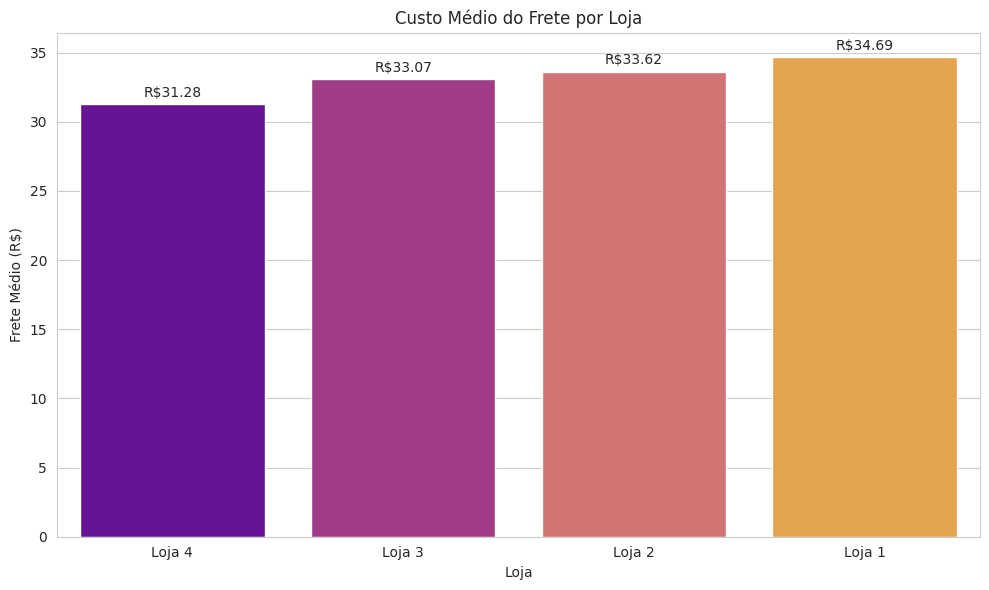

In [8]:
print("\n\n--- 6. Custo Médio do Frete ('Frete') ---")
frete_medio = df_combinado.groupby('Loja')['Frete'].mean().reset_index()
frete_medio = frete_medio.sort_values(by='Frete', ascending=True) # Ordenar do menor para o maior frete

print("Custo Médio do Frete por Loja:")
# Formatando a saída numérica
frete_medio_formatado = frete_medio.copy()
frete_medio_formatado['Frete'] = frete_medio_formatado['Frete'].map('R${:,.2f}'.format)
print(frete_medio_formatado.to_string(index=False))

# Gráfico do Frete Médio
ax_frete = sns.barplot(x='Loja', y='Frete', data=frete_medio, palette='plasma', order=frete_medio['Loja'])
ax_frete.set_title('Custo Médio do Frete por Loja')
ax_frete.set_xlabel('Loja')
ax_frete.set_ylabel('Frete Médio (R$)')

# Adicionar rótulos de dados
for container in ax_frete.containers:
    ax_frete.bar_label(container, fmt='R${:.2f}', label_type='edge', padding=3)
plt.tight_layout()
plt.show()


## Relatorio.

# 📝 Relatório - Desafio Alura Store

## 📊 Faturamento Total das Lojas

- **Loja 1:** R$ 1.534.509,12
- **Loja 2:** R$ 1.488.459,06  
- **Loja 3:** R$ 1.464.025,03
- **Loja 4:** R$ 1.384,497,58  

> ✅ A **Loja 1** possui o maior faturamento total.

---

## 🏷️ Categorias de Produtos Mais e Menos Vendidas

- **Categoria mais vendida:** *Moveis*  
- **Categoria menos vendida:** *Utilidades Domesticas*  

> 🔍 Moveis possuem grande volume de vendas.

---

## 🌟 Média de Avaliação dos Clientes por Loja

- **Loja 1:** ⭐️ 3.98  
- **Loja 2:** ⭐️ 4.04  
- **Loja 3:** ⭐️ 4.05  
- **Loja 4:** ⭐️ 4.00  

> ✅ **Loja 3** tem a melhor média de avaliação dos clientes.

---

## 📦 Produtos Mais e Menos Vendidos

- **Produtos mais vendidos:**  
  - Micro-ondas  
  - Iniciando em programação  
  - kit banquetas
  - Cama box

- **Produtos menos vendidos:**  
  - Celular ABXY  
  - Jogo de tabuleiro  
  - Blocos de montar
  - Guitarra

---

## 🚚 Frete Médio de Cada Loja

- **Loja 1:** R$ 34,69  
- **Loja 2:** R$ 33,62  
- **Loja 3:** R$ 33,07   
- **Loja 4:** R$ 31,28   

> 🚛 **Loja 4** tem o menor frente.

---

## ✅ Conclusão e Recomendações

Com base na análise dos dados, a **Loja 1** se destaca como a principal candidata para venda.

**Justificativa:**
- **Pior Avaliação:** Possui a pior média de avaliação por parte dos clientes (3.98). Avaliações baixas podem impactar negativamente a reputação e futuras vendas.
- **Maior Custo de Frete:** Tem o custo médio de frete mais elevado (R$34.69). Isso pode tornar a loja menos competitiva ou indicar problemas logísticos que aumentam os custos operacionais.
- A categoria mais popular da Loja 1 é 'moveis' com 465 vendas.
- Seu produto mais vendido é 'Micro-ondas' (60 vendas) e o menos vendido é 'Celular ABXY' (33 vendas).
